<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

### **The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook.**

In [1]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.pipeline import make_pipeline
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout

# def create_model():
#     model = Sequential([
#         Dense(128, activation='relu', input_dim=13),
#         Dense(128, activation='relu'),
#         Dense(128, activation='relu'),
#         Dropout(0.5),
#         Dense(1, activation='relu')
#     ])

#     model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

#     return model

# # results = model.fit(X,y, epochs=100)

# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# regressor = KerasRegressor(create_model, epochs=100)

# clf = make_pipeline(MinMaxScaler(), regressor)

# clf.fit(X_train, y_train)

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from tensorflow.keras.datasets import boston_housing

In [4]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [5]:
print(f'Training data : {train_data.shape}')
print(f'Target : {train_targets.shape}')
print(f'Test data : {test_data.shape}')
print(f'Target data : {test_targets.shape}')


Training data : (404, 13)
Target : (404,)
Test data : (102, 13)
Target data : (102,)


In [6]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

### **Normalize the data (all features should have roughly the same scale)**

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
mm_scaler = MinMaxScaler()
X_train = mm_scaler.fit_transform(train_data)
X_test = mm_scaler.transform(test_data)

y_train = train_targets
y_test = test_targets

In [9]:
X_train

array([[1.37816304e-02, 0.00000000e+00, 2.81524927e-01, ...,
        8.93617021e-01, 1.00000000e+00, 4.68818985e-01],
       [1.73654275e-04, 8.25000000e-01, 5.75513196e-02, ...,
        2.23404255e-01, 9.96167230e-01, 3.80794702e-02],
       [5.49837765e-02, 0.00000000e+00, 6.46627566e-01, ...,
        8.08510638e-01, 9.46089061e-01, 4.22185430e-02],
       ...,
       [3.18534767e-04, 3.50000000e-01, 2.05278592e-01, ...,
        4.57446809e-01, 9.12627969e-01, 1.68322296e-01],
       [2.40852297e-02, 0.00000000e+00, 7.00879765e-01, ...,
        2.23404255e-01, 6.59715568e-01, 3.87969095e-01],
       [9.07048543e-05, 6.00000000e-01, 9.05425220e-02, ...,
        3.19148936e-01, 9.49064501e-01, 7.31236203e-02]])

### **Import the type of model and layers that you will need from Keras.**

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

### **Instantiate a model object and use model.add() to add layers to your model**
### **Since this is a regression model you will have a single output node in the final layer**
### **Use activation functions that are appropriate for this task**

In [11]:
model = Sequential()
model.add(Dense(100, activation = 'relu', input_dim = 13))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(1))

### **Compile your model**

In [12]:
model.compile(optimizer = 'nadam', loss='mse', metrics=['mae', 'mse'])

### **Fit your model and report its accuracy in terms of Mean Squared Error**

In [13]:
results = model.fit(X_train, y_train, epochs = 100, 
                   validation_data = (X_test, y_test))

Train on 404 samples, validate on 102 samples
Epoch 1/100
404/404 [==============================] - 1s 2ms/sample - loss: 554.4633 - mae: 21.6494 - mse: 554.4633 - val_loss: 522.1727 - val_mae: 20.8671 - val_mse: 522.1727
Epoch 2/100
404/404 [==============================] - 0s 72us/sample - loss: 388.0178 - mae: 17.1266 - mse: 388.0178 - val_loss: 236.3025 - val_mae: 12.7608 - val_mse: 236.3025
Epoch 3/100
404/404 [==============================] - 0s 356us/sample - loss: 147.8572 - mae: 9.2121 - mse: 147.8572 - val_loss: 107.2009 - val_mae: 7.8047 - val_mse: 107.2009
Epoch 4/100
404/404 [==============================] - 0s 107us/sample - loss: 87.4986 - mae: 7.0141 - mse: 87.4987 - val_loss: 80.4775 - val_mae: 6.7470 - val_mse: 80.4775
Epoch 5/100
404/404 [==============================] - 0s 126us/sample - loss: 66.7602 - mae: 6.0084 - mse: 66.7601 - val_loss: 62.1051 - val_mae: 5.7446 - val_mse: 62.1051
Epoch 6/100
404/404 [==============================] - 0s 375us/sample - los

### **Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch.**

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
results.history.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

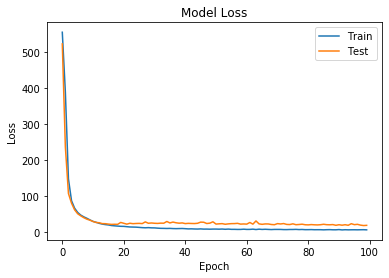

In [16]:
sns.lineplot(range(100), results.history['loss']);
sns.lineplot(range(100), results.history['val_loss']);
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

### **Run this same data through a linear regression model. Which achieves higher accuracy?**

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print('----Train----')
print(f'training data linear regression : {mean_squared_error(model2.predict(X_train), y_train)}')
print(f'training data neural network : {mean_squared_error(model.predict(X_train), y_train)}')
print('----Test----')
print(f'test data linear regression : {mean_squared_error(model2.predict(X_test), y_test)}')
print(f'test data neural network : { mean_squared_error(model.predict(X_test), y_test)}')

----Train----
training data linear regression : 22.00480083834814
training data neural network : 5.9898606158665535
----Test----
test data linear regression : 23.19559925642293
test data neural network : 19.011328485598636


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

### **Load and preprocess the image data similar to how we preprocessed the MNIST data in class.**

In [19]:
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist

In [20]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [21]:
# Normalize Our Data
X_train = train_images / 255
X_test = test_images / 25

In [22]:
X_train.shape, train_labels.shape, X_test.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### **Make sure to one-hot encode your category labels**

In [23]:
num_classes = 10
y_train = keras.utils.to_categorical(train_labels, num_classes) #keras encoding here
y_test = keras.utils.to_categorical(test_labels, num_classes)

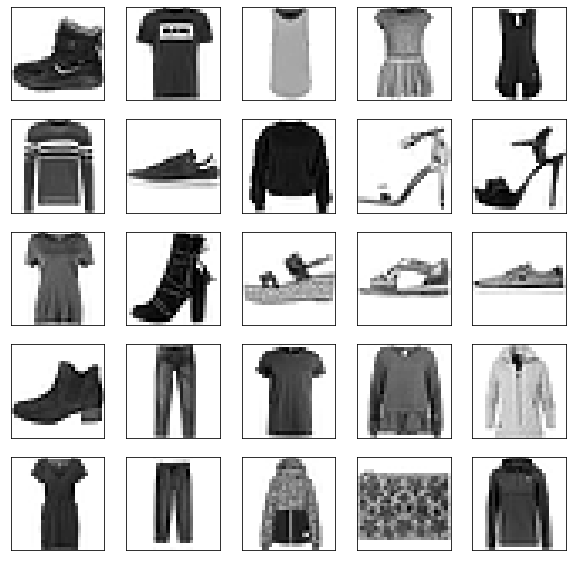

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

### **The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.**

In [25]:
model = Sequential()
model.add(Flatten(input_shape=(28,28))) #images for 2 dimensions (after number of observations for input shape)
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation="softmax")) #always last layer before compile model and only classification

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
results = model.fit(X_train, y_train, epochs=10, validation_data =(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.4963 - accuracy: 0.8249 - val_loss: 1.6941 - val_accuracy: 0.8395
Epoch 2/10
60000/60000 [==============================] - 10s 173us/sample - loss: 0.3737 - accuracy: 0.8644 - val_loss: 1.4712 - val_accuracy: 0.8546
Epoch 3/10
60000/60000 [==============================] - 14s 233us/sample - loss: 0.3372 - accuracy: 0.8762 - val_loss: 1.5190 - val_accuracy: 0.8535
Epoch 4/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.3127 - accuracy: 0.8849 - val_loss: 1.7994 - val_accuracy: 0.8383
Epoch 5/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.2926 - accuracy: 0.8914 - val_loss: 1.4222 - val_accuracy: 0.8608
Epoch 6/10
60000/60000 [==============================] - 10s 168us/sample - loss: 0.2792 - accuracy: 0

In [28]:
model.evaluate(X_train, y_train)

60000/60000 [==============================] - 3s 57us/sample - loss: 0.2378 - accuracy: 0.9114


[0.2377637138148149, 0.91135]

In [29]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 70us/sample - loss: 1.5495 - accuracy: 0.8562


[1.549465855652839, 0.8562]

### **Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch.**

In [30]:
results.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

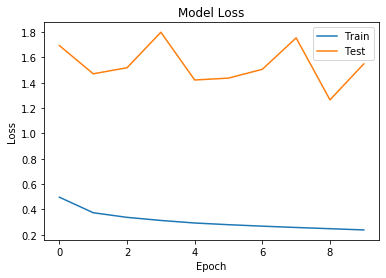

In [31]:
sns.lineplot(range(10), results.history['loss']);
sns.lineplot(range(10), results.history['val_loss']);
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [32]:
import numpy as np

In [33]:
predictions = model.predict(np.array(X_test))

In [34]:
predictions[0] #9 is predicted 

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 5.0621953e-36,
       0.0000000e+00, 1.0000000e+00], dtype=float32)

In [35]:
np.argmax(predictions[0])

9

In [36]:
y_test[0] #and we get 9

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.

https://mlfromscratch.com/gridsearch-keras-sklearn/#/
https://github.com/lakshayg/tensorflow-build

In [37]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [38]:
# LOAD DATA
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# PREPROCESSING
def preprocess_mnist(x_train, y_train, x_test, y_test):
    # Normalizing all images of 28x28 pixels
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    
    # Float values for division
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    
    # Normalizing the RGB codes by dividing it to the max RGB value
    x_train /= 255
    x_test /= 255
    
    # Categorical y values
    y_train = keras.utils.to_categorical(y_train)
    y_test= keras.utils.to_categorical(y_test)
    
    return x_train, y_train, x_test, y_test, input_shape
    
X_train, y_train, X_test, y_test, input_shape = preprocess_mnist(x_train, y_train, x_test, y_test)


In [39]:
# Readying neural network model
def build_cnn(activation = 'relu',
              dropout_rate = 0.2,
              optimizer = 'adam'):
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size=(3, 3),
              activation=activation,
              input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation=activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))
    model.add(Flatten())
    model.add(Dense(128, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(
        loss='categorical_crossentropy', 
        optimizer=optimizer, 
        metrics=['accuracy']
    )
    
    return model

In [40]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [42]:
param_grid = {
              'epochs':[1,2,3],
              'batch_size':[128]
              #'epochs' :              [100,150,200],
              #'batch_size' :          [32, 128],
              #'optimizer' :           ['Adam', 'Nadam'],
              #'dropout_rate' :        [0.2, 0.3],
              #'activation' :          ['relu', 'elu']
             }

model = KerasClassifier(build_fn = build_cnn)

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                        param_grid, cv=5, scoring_fit='neg_log_loss')

print(model.best_score_)
print(model.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 30.4min finished


Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 72s 1ms/sample - loss: 0.4492 - accuracy: 0.8410
Epoch 2/3
60000/60000 [==============================] - 71s 1ms/sample - loss: 0.2863 - accuracy: 0.8972
Epoch 3/3
60000/60000 [==============================] - 71s 1ms/sample - loss: 0.2405 - accuracy: 0.9130
-0.2450875526281989
{'batch_size': 128, 'epochs': 3}
